# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

5


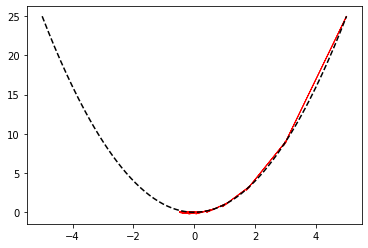

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2

x = np.linspace(-5, 5, 200)
y = f(x)
plt.plot(x, y, '--k', ms=10);


def step_gradient_1d(x_current, learningRate):
    x_gradient = 2*x_current
    new_x = x_current - x_gradient * learningRate
    
    plt.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
              head_width=0.05, head_length=0.5,ec="red")
        
    return new_x
def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations):
    x = starting_x
    print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate)
        #print(x)
    return x

learning_rate = 0.2
initial_x = 5 
num_iterations = 30
x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)

plt.show()


# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

5


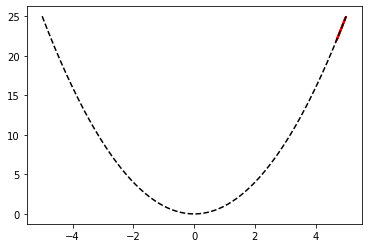

5


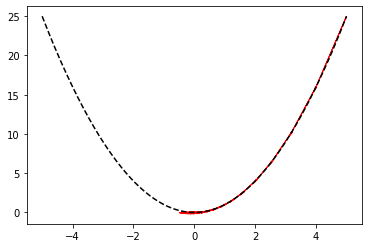

5


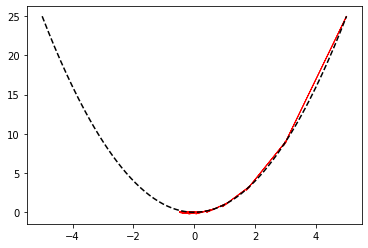

5


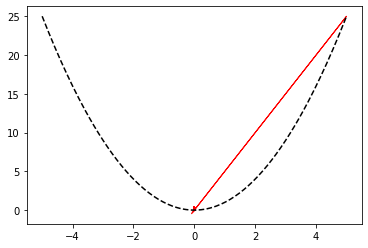

5


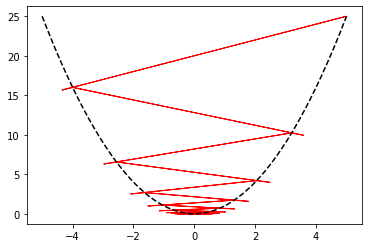

5


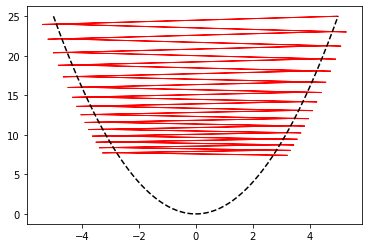

5


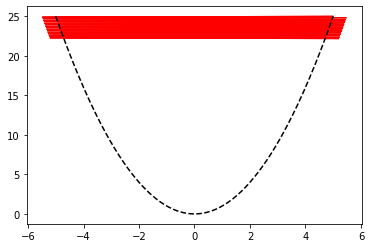

In [2]:
for learning_rate in [0.001, 0.1, 0.2, 0.5, 0.9, 0.99, 0.999]:
    x = np.linspace(-5, 5, 200)
    y = f(x)
    plt.plot(x, y, '--k', ms=10);
    x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)

    plt.show()

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

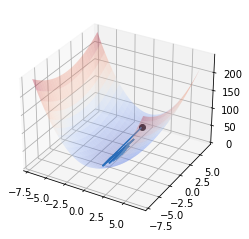

In [3]:
###########

import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

plt.close('all')

fun = lambda x,y: 4*x**2+y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)


#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 2*x_current
    y_gradient = 2*y_current
    
    new_x = x_current - learning_rate * x_gradient
    new_y = y_current - learning_rate * y_gradient
    
    ax.quiver(x_current, y_current, (fun(x_current, y_current)) ,
              - (learningRate * x_gradient), - (learningRate * y_gradient), 
              (-(fun(x_current,y_current)-fun(new_x,new_y)))) 
    
    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.9
initial_x = 0 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()


# Zadanie
Wykonaj analogiczne zadanie ale z:
  * initial_x = 5 
  * initial_y = 0 
  * num_iterations = 10

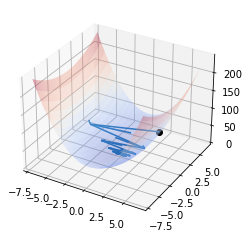

In [4]:
plt.close('all')

fun = lambda x,y: 4*x**2+y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)

learning_rate = 0.9
initial_x = 5 # initial y-intercept guess
initial_y = 0 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()

# Zadanie
Wykonaj analogiczne zadanie ale z obrazkiem 2d

$$
f(x,y)=x^2-2x+y^2,
$$ 

oraz

$$
f(x,y)=4*x^2-2x+y^2,
$$ 


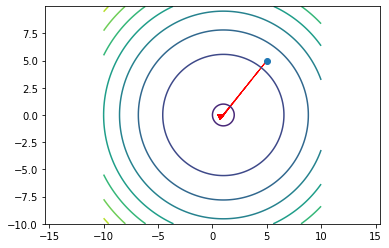

In [5]:
import numpy as np
import matplotlib.pyplot as plt

chi2 = lambda x,y: x**2-2*x+y**2

x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)

X,Y= np.meshgrid(x,y)

Z = chi2(X,Y)

plt.figure()
CS = plt.contour(X,Y,Z)

plt.plot([5],[5],"o")

#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 2*x_current-2
    y_gradient = 2*y_current
    
    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)
    
    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.05, head_length=0.5,ec="red")
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.1
initial_x = 5 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 1000
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
plt.axis('equal')
plt.show()

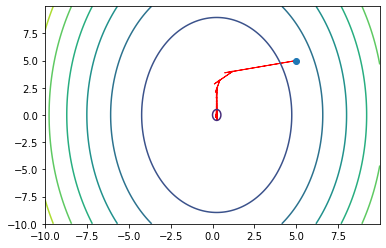

In [6]:
import numpy as np
import matplotlib.pyplot as plt

chi2 = lambda x,y: 4*x**2-2*x+y**2

x = np.arange(-10,10,0.02)
y = np.arange(-10,10,0.02)

X,Y= np.meshgrid(x,y)

Z = chi2(X,Y)

plt.figure()
CS = plt.contour(X,Y,Z)

plt.plot([5],[5],"o")

#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 8*x_current-2
    y_gradient = 2*y_current
    
    new_x = x_current - (learningRate * x_gradient)
    new_y = y_current - (learningRate * y_gradient)
    
    plt.arrow(x_current, y_current, - (learningRate * x_gradient), - (learningRate * y_gradient), head_width=0.05, head_length=0.5,ec="red")
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.1
initial_x = 5 # initial y-intercept guess
initial_y = 5 # initial slope guess
num_iterations = 1000
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################
plt.show()


# Zadanie 3

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2-y^2$, startując z punktu $x=5$ oraz $x=1$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

Wykonaj rysunek:
  
  * 2D conture plot
  * 3D 
  
Co się stanie gdy zaczniemy z punktu $x=5$ oraz $x=0$? 

3.0 0.0
1.7999999999999998 0.0
1.0799999999999998 0.0
0.6479999999999999 0.0
0.3887999999999999 0.0
0.23327999999999993 0.0
0.13996799999999995 0.0
0.08398079999999997 0.0
0.05038847999999998 0.0
0.030233087999999984 0.0


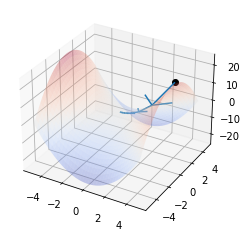

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

plt.close('all')

fun = lambda x,y: x**2-y**2
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)

#####################################
def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 2*x_current
    y_gradient = -2*y_current
    
    new_x = x_current - learningRate*x_gradient
    new_y = y_current - learningRate*y_gradient
    
    ax.quiver(x_current, y_current, (fun(x_current, y_current)) ,
              - (learningRate * x_gradient), - (learningRate * y_gradient), 
              (-(fun(x_current,y_current)-fun(new_x,new_y)))) 
    
    return [new_x, new_y]
def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        print(x, y)
    return [x, y]

learning_rate = 0.2
initial_x = 5 # initial y-intercept guess
initial_y = 0 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)

#####################################
plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()